In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys
import copy
import matplotlib
%matplotlib inline
sys.path.append("..")
from demo_2_awac import och_2_awac
import adept_envs
import gym
env = gym.make("SliderCabinetKnobResetFree-v0", **{'idx_completion': False})

all_paths = ['../recordings/slider_cabinet_knob_hardware_may1_part0.pkl',
            '../recordings/slider_cabinet_knob_hardware_may1_part10.pkl',
            '../recordings/slider_cabinet_knob_hardware_may1_part11.pkl',
            '../recordings/slider_cabinet_knob_hardware_may1_part12.pkl',
            '../recordings/slider_cabinet_knob_hardware_may1_part1.pkl',
            '../recordings/slider_cabinet_knob_hardware_may1_part2.pkl',
            '../recordings/slider_cabinet_knob_hardware_may1_part3.pkl',
            '../recordings/slider_cabinet_knob_hardware_may1_part4.pkl',
            '../recordings/slider_cabinet_knob_hardware_may1_part5.pkl',
            '../recordings/slider_cabinet_knob_hardware_may1_part6.pkl',
            '../recordings/slider_cabinet_knob_hardware_may1_part7.pkl',
            '../recordings/slider_cabinet_knob_hardware_may1_part8.pkl',
            '../recordings/slider_cabinet_knob_hardware_may1_part9.pkl']
             
dat = []

for p in all_paths:
    dat_curr = pickle.load(open(p, 'rb'))
    dat += dat_curr
print(len(dat))


Launching Timeslicer
 [     ] : Replacing old SSH connection          [■    ] : New SSH Established         [■■   ] : Killed old timeslicers          [■■■  ] : Started timeslicer spinup         [■■■■ ] : Timeslicer successfully started         [■■■■■] : Timeslicer launched with no errors          
***ROBOT ENABLED***
574


In [2]:
list_awac = och_2_awac(dat)
print(list_awac[0]['observations'].shape)
print(env.get_obs_dict())

(103, 22)
OrderedDict([('gripper_width', array([0.])), ('dynamixel_pos', array([4.9440203 , 3.2888548 , 0.88203895], dtype=float32)), ('ee_pos', array([ 0.03873606, -0.03770242,  0.99942052])), ('ee_quat', array([-0.27528976,  0.63998123, -0.29664955,  0.6531758 ])), ('goal', array([ 4.39178705,  3.14312673,  1.17963123,  0.02440602, -0.05665759,
        1.0348293 , -0.29214895,  0.65307435, -0.27421826,  0.6426097 ,
        0.03750031]))])


(103, 22)


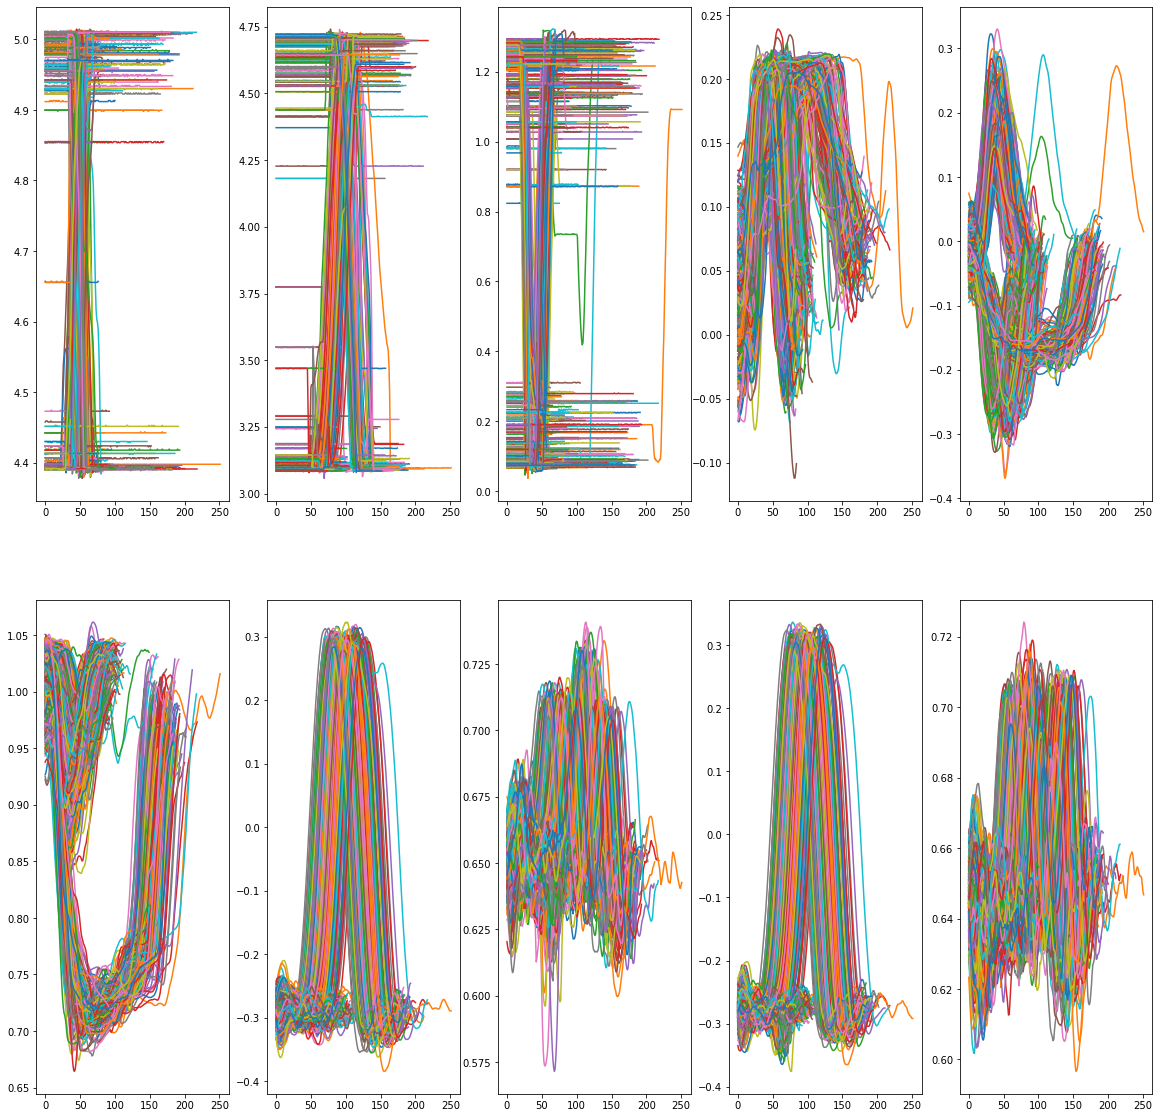

In [3]:
list_awac = och_2_awac(dat)
print(list_awac[0]['observations'].shape)
curr_x = 0
fig, ax = plt.subplots(2, 5, figsize=(20, 20))
for p in list_awac:
    for i in range(2):  
        for j in range(5):
            ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])

plt.show()

FOUND A BROKEN DEMO
FOUND A BROKEN DEMO
FOUND A BROKEN DEMO
FOUND A BROKEN DEMO
FOUND A BROKEN DEMO


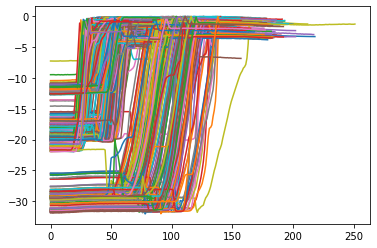

FOUND A BROKEN DEMO
FOUND A BROKEN DEMO
FOUND A BROKEN DEMO
FOUND A BROKEN DEMO
FOUND A BROKEN DEMO


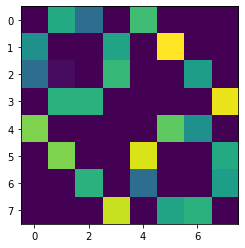

In [4]:
import itertools

def check_goal_completion(curr_pos):
    max_objs = np.array([4.8, 4.4, 0.7])
    min_objs = np.array([4.5, 3.6, 0.4])
    init_bitflips = np.array([0, 0, 0])
    curr_bitflips = init_bitflips.copy()
    if len(curr_pos.shape) > 1:
        curr_pos = curr_pos.squeeze(axis=0)
    for j in range(3):
        if curr_pos[j] > max_objs[j]:
            curr_bitflips[j] = 1
        elif curr_pos[j] < min_objs[j]:
            curr_bitflips[j] = 0
    new_idx = 4 * curr_bitflips[0] + 2 * curr_bitflips[1] + curr_bitflips[2]
    return new_idx

idx_completion = False
def end_relabel(env, path):
    o_size = 11
    path['observations'][:, o_size:] = path['observations'][-1, :o_size].copy()
    path['next_observations'][:, o_size:] = path['observations'][-1, :o_size]
    env.env.goal_idx = check_goal_completion(path['observations'][-1, 0:3])
    env.env.current_idx = check_goal_completion(path['observations'][0, 0:3])
    env.env.goal = path['observations'][-1, :o_size].copy()
    env.env._idx_completion = idx_completion
    path['rewards'] = np.zeros_like(path['rewards'])
    for idx in range(len(path['observations'])):
        reward_dict = env.env.get_reward_dict(None, {'dynamixel_pos': path['observations'][idx:idx+1, 0:3],
                                                     'ee_pos': path['observations'][idx:idx+1, 3:6]})
        path['rewards'][idx] = np.sum([v for k, v in reward_dict.items()])
    return path


list_awac = och_2_awac(dat)
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt 
curr_x = 0  
label_list = itertools.product(['SC', 'SO'], ['KC', 'KO'], ['CC', 'CO'])
tasks = ['-'.join(s) for s in label_list]
# tasks = ['CC', 'CO', 'OC', 'OO']
task_list = []
adjacency_matrix = np.zeros((8, 8))
labeled_goals = [[] for _ in range(8)]
counts_starts = np.zeros(8)
counts_goals = np.zeros(8)
end_states = [None for _ in range(8)]
path_lists = [[[] for _ in range(8)] for _ in range(8)]
filtered_paths = []
for i, path in enumerate(list_awac):
    start_idx = check_goal_completion(path['observations'][0, 0:3])
    end_idx = check_goal_completion(path['observations'][-1, 0:3])
    if start_idx == end_idx:
        print("FOUND A BROKEN DEMO")
        continue
    end_relabel(env, path)
    plt.plot(path['rewards'])
    filtered_paths.append(path)
plt.show()
    
for p in list_awac:
    curr_x += len(p['observations'])
    start_idx = check_goal_completion(p['observations'][0, 0:3])
    start = tasks[start_idx]
    end_idx = check_goal_completion(p['observations'][-1, 0:3])
    if start_idx == end_idx:
        print("FOUND A BROKEN DEMO")
        continue
    end = tasks[end_idx]
    adjacency_matrix[start_idx, end_idx] += 1
    path_lists[start_idx][end_idx].append(copy.deepcopy(p))
    task_list.append(check_goal_completion(p['observations'][-1, 0:3]))
    labeled_goals[end_idx].append(p['observations'][-1])
    counts_goals[end_idx] += 1
    counts_starts[start_idx] += 1
    if end_states[end_idx] is None:
        end_states[end_idx] = p['observations'][-1, :11]
plt.show() 

plt.imshow(adjacency_matrix)
plt.show()

In [5]:
end_states

[array([ 4.39178705,  3.0940392 ,  0.20095149,  0.0444453 ,  0.02754929,
         0.97591208, -0.30159994,  0.64536079, -0.26649075,  0.64925312,
         0.03750031]),
 array([ 4.39178705,  3.09250522,  1.16429138,  0.04768093, -0.06012345,
         1.00817753, -0.30539008,  0.64967912, -0.27671088,  0.63881533,
         0.03750031]),
 array([ 4.39332104,  4.69551516,  0.20095149,  0.01888437, -0.01894879,
         1.01935089, -0.2631144 ,  0.64884354, -0.27331835,  0.65959832,
         0.03750031]),
 array([ 4.39332104,  4.69551516,  0.87283504,  0.01427205, -0.02840645,
         1.02014724, -0.30742843,  0.65173267, -0.27718558,  0.63553162,
         0.03750031]),
 array([ 5.00844717,  3.0940392 ,  0.20248546,  0.00861386, -0.02300323,
         1.01237061, -0.27507748,  0.64909246, -0.28411188,  0.64983982,
         0.03750031]),
 array([ 5.00998116,  3.13852477,  0.87283504,  0.05705869, -0.00802614,
         1.01305696, -0.28434663,  0.65309789, -0.27301538,  0.64658545,
         

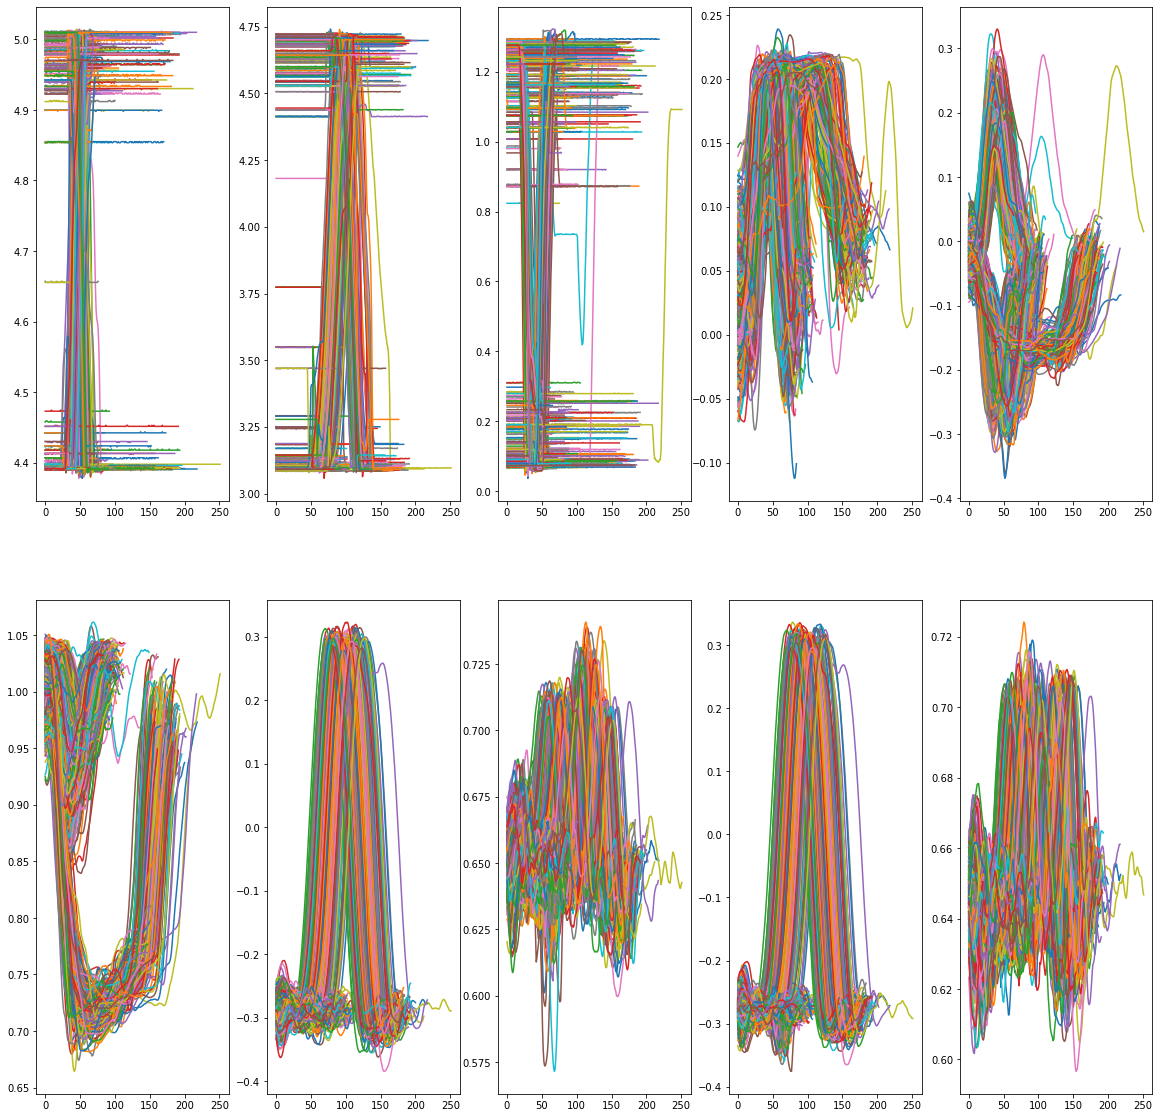

In [6]:
curr_x = 0
fig, ax = plt.subplots(2, 5, figsize=(20, 20))
for p in filtered_paths:
    for i in range(2):  
        for j in range(5):
            ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])

plt.show()

In [7]:
pickle.dump(filtered_paths, open('demo_list_hardware_cabinet_slider_knob_relabeled_dense.pkl', 'wb'))

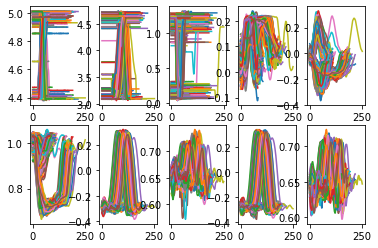

In [8]:
fig, ax = plt.subplots(2, 5)
for p in filtered_paths:
    for i in range(2):  
        for j in range(5):
            if i*5 +j == 1: 
                ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])
            else:
                ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])
plt.show()